# Индивидуальное задание

In [75]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt

In [76]:
def img_input(img_path, size=(0,0), type=1):
    img = cv2.imread(img_path,type)
    if type == 1:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if size != (0,0):
            img = cv2.resize(img, size)
            return img
        else:
            return img
    else:
        if size != (0,0):
            img = cv2.resize(img, size)
            return img
        else:
            return img

In [77]:
def img_print(images, titles, row_and_colm=(0,0), hard_type='None'):
    num_of_img = len(images)
    if hard_type == 'None':
        for i in range(num_of_img):
            if row_and_colm == (0,0):
                plt.subplot(1,num_of_img,i+1),plt.imshow(images[i])
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
            else:
                plt.subplot(row_and_colm[0],row_and_colm[1],i+1),plt.imshow(images[i])
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
        plt.show ()

    else:
        for i in range(num_of_img):
            if row_and_colm == (0,0):
                plt.subplot(1,num_of_img,i+1),plt.imshow(images[i], hard_type)
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
            else:
                plt.subplot(row_and_colm[0],row_and_colm[1],i+1),plt.imshow(images[i], hard_type)
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
        plt.show ()

Найти границы изображения функцией cv2.findContours(), протестировать её с двумя параметрами CHAIN_APPROX_NONE и CHAIN_APPROX_SIMPLE. Выделить границы методом Канни

In [78]:
image = img_input('pic/CatWithShadow.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [79]:
image_blur = cv2.medianBlur(gray, 5)
thresh = cv2.adaptiveThreshold(image_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

Найдём контуры с CHAIN_APPROX_NONE

In [80]:
contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

Отобразим на изображении все найденные контуры

In [81]:
img_with_contours = image.copy()
for contour in contours:
    cv2.drawContours(img_with_contours, contour, -1, (0,255,0), 2)

Найдём контуры с CHAIN_APPROX_SIMPLE

In [82]:
contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

Отобразим на изображении все найденные контуры

In [83]:
img_with_contours2 = image.copy()
for contour in contours:
    cv2.drawContours(img_with_contours2, contour, -1, (0,255,0), 2)

Выделим границы методом Кенни

In [84]:
Kenny = cv2.Canny(image, 47, 0, apertureSize = 3)

Вывод

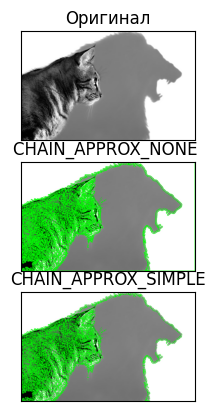

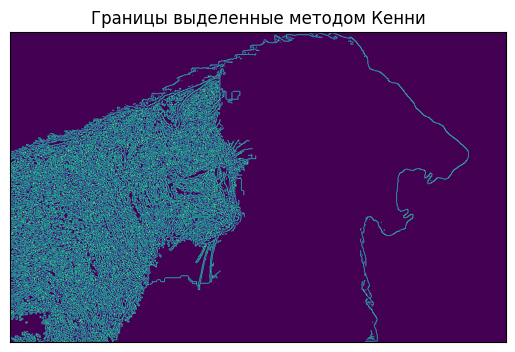

In [85]:
res1 = [image, img_with_contours, img_with_contours2]
title1 = ['Оригинал', 'CHAIN_APPROX_NONE ', 'CHAIN_APPROX_SIMPLE']

img_print(res1, title1, row_and_colm=(3,1))

res2 = [Kenny]
title2 = ['Границы выделенные методом Кенни']

img_print(res2, title2)